<div style="display: flex; align-items: center;">
    <div style="flex: 1;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/The_logo_of_Jacobs_Engineering_Group.png" alt="Company Logo" style="width: 150px;">
        <p><strong>Project:</strong> BP AREH WTG Foundations<p>
        <p><strong>Subject:</strong> 10% Concept Design - Fully Drained Option<p>
    </div>
</div>

<table>
  <tr>
    <th>Created by</th>
    <th>Checked by</th>
    <th>Approved by</th>
    <th>Date created</th>
    <th>Date checked</th>
    <th>Date approved</th>
  </tr>
  <tr>
    <td>Andrew Mountjoy</td>
    <td>Chris Cardno</td>
    <td>Chris Cardno</td>
    <td>17-07-2025</td>
    <td>17-07-2025</td>
    <td>17-07-2025</td>
  </tr>
</table>

The notebook uses the WTF_Concept Python module to carry out initial wind turbine gravity foundation sizing and checks for concept design. This calculation set considers the fully submerged option.

In [315]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import WTF concept design module and create an instance of the design class:

In [317]:
import WTF_Concept

In [318]:
wf = WTF_Concept.WTF_Concept_Design(submerged=False) #Fully drained option
util = WTF_Concept.Utilities()

## Material properties

Enter material properties:

In [321]:
wf.mat_prop_input()

## Loading

Read in the manufacturer's loadcases, first for the enveloped results without partial factors (to be used for turbine manufacturer checks) and then for the enveloped results with partial factors (to be used for the ULS verifications):

In [324]:
LCs_wout_pf = wf.read_LCs(filename = "Loadcases_env_wout_factor.csv")

LCs_wout_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,6891.29,1526.58,2525.02,176622.72,1,0.55
Mx_Min,6897.52,1638.50,-2801.73,167538.33,1,0.55
My_Max,7117.85,1280.97,1817.12,168481.43,1,0.55
My_Min,6944.34,870.90,749.24,119797.52,1,0.55
Mxy_Max,6706.11,1633.59,4581.85,182331.93,1,0.55
Mxy_Min,7213.88,65.81,-605.33,7.49,1,0.55
Mz_Max,7013.75,1008.29,13465.39,118777.58,1,0.55
Mz_Min,6911.55,814.27,-16345.30,85991.11,1,0.55
Fx_Max,6783.59,1593.68,-6789.03,153173.07,1,0.55


In [325]:
LCs_w_pf = wf.read_LCs(filename = "Loadcases_env_w_factor.csv")

LCs_w_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,7136.859259,1396.437037,3838.162963,162817.548100,1.35,0.55
Mx_Min,7049.333333,1507.051852,-4416.444444,167601.281500,1.35,0.55
My_Max,7078.837037,1236.733333,955.762963,159948.651900,1.35,0.55
My_Min,6944.336364,870.900000,749.245455,119797.518200,1.10,0.55
Mxy_Max,7056.674074,1443.896296,4606.970370,166755.400000,1.35,0.55
Mxy_Min,7213.881818,65.809091,-605.327273,7.490909,1.10,0.55
Mz_Max,7387.851852,658.392593,12183.881480,73915.444440,1.35,0.55
Mz_Min,6911.545455,814.272727,-16345.300000,85991.109090,1.10,0.55
Fx_Max,7189.251852,1235.362963,-3790.355556,154382.740700,1.35,0.55


The Australian codes include a wind speed climate change multiplier which Goldwind won't have included already. This is, $M_c = 1.05$. We now apply this to the relevant load effects, noting that wind speed is proportional to wind load squared:

In [327]:
LCs_wout_pf.iloc[:,1:4] = LCs_wout_pf.iloc[:,1:4] * 1.05**2

LCs_wout_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,6891.29,1683.054450,2783.834550,194726.548800,1,0.55
Mx_Min,6897.52,1806.446250,-3088.907325,184711.008825,1,0.55
My_Max,7117.85,1412.269425,2003.374800,185750.776575,1,0.55
My_Min,6944.34,960.167250,826.037100,132076.765800,1,0.55
Mxy_Max,6706.11,1801.032975,5051.489625,201020.952825,1,0.55
Mxy_Min,7213.88,72.555525,-667.376325,8.257725,1,0.55
Mz_Max,7013.75,1111.639725,14845.592475,130952.281950,1,0.55
Mz_Min,6911.55,897.732675,-18020.693250,94805.198775,1,0.55
Fx_Max,6783.59,1757.032200,-7484.905575,168873.309675,1,0.55


In [328]:
LCs_w_pf.iloc[:,1:4] = LCs_w_pf.iloc[:,1:4] * 1.05**2

LCs_w_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m)
Loadcase,,,,,,
Mx_Max,7136.859259,1539.571833,4231.574667,179506.346780,1.35,0.55
Mx_Min,7049.333333,1661.524667,-4869.130000,184780.412854,1.35,0.55
My_Max,7078.837037,1363.498500,1053.728667,176343.388720,1.35,0.55
My_Min,6944.336364,960.167250,826.043114,132076.763816,1.10,0.55
Mxy_Max,7056.674074,1591.895666,5079.184833,183847.828500,1.35,0.55
Mxy_Min,7213.881818,72.554523,-667.373318,8.258727,1.10,0.55
Mz_Max,7387.851852,725.877833,13432.729332,81491.777495,1.35,0.55
Mz_Min,6911.545455,897.735682,-18020.693250,94805.197772,1.10,0.55
Fx_Max,7189.251852,1361.987667,-4178.867000,170206.971622,1.35,0.55


Relevant load combinations are as follows:

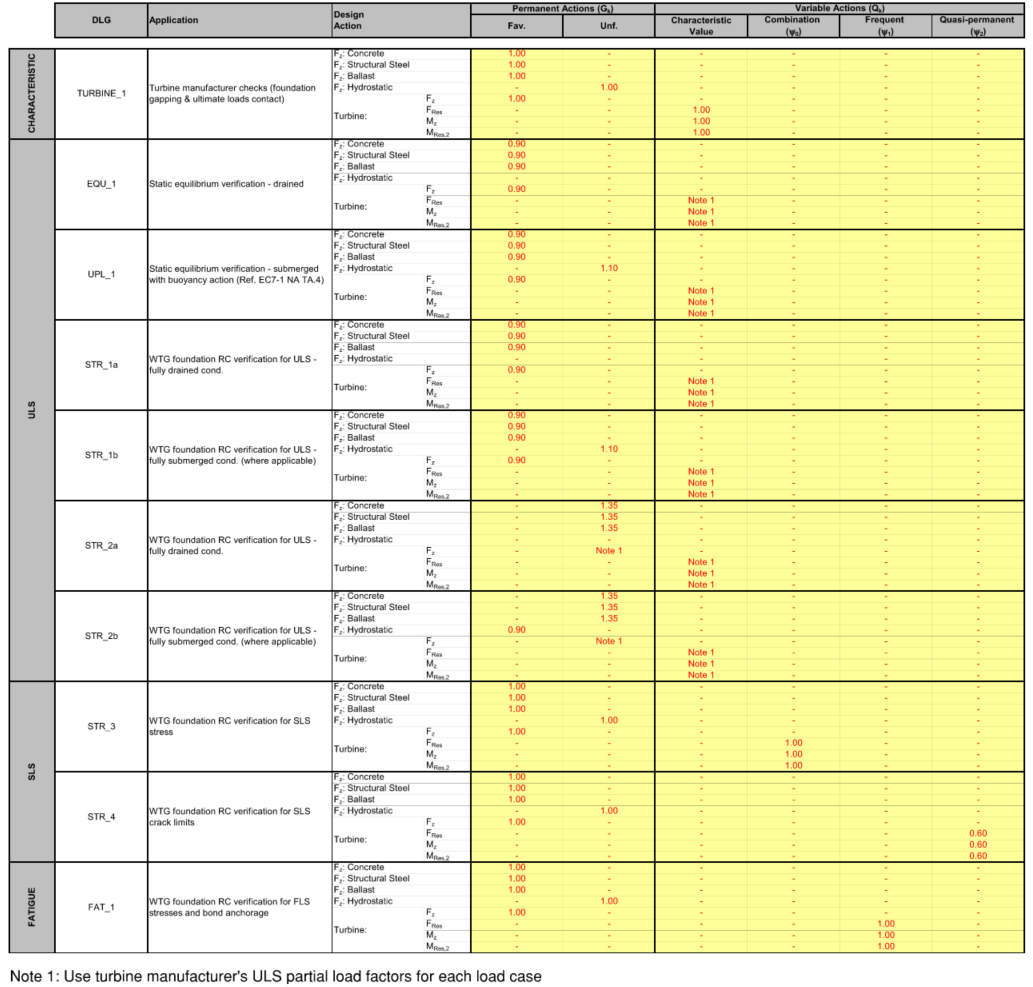

In [330]:
util.disp_image('combinations.png')

## Geometry

The base diameters of the proposed turbines are 4.45m, 4.77m, 4.95m and 5.95m as shown below:

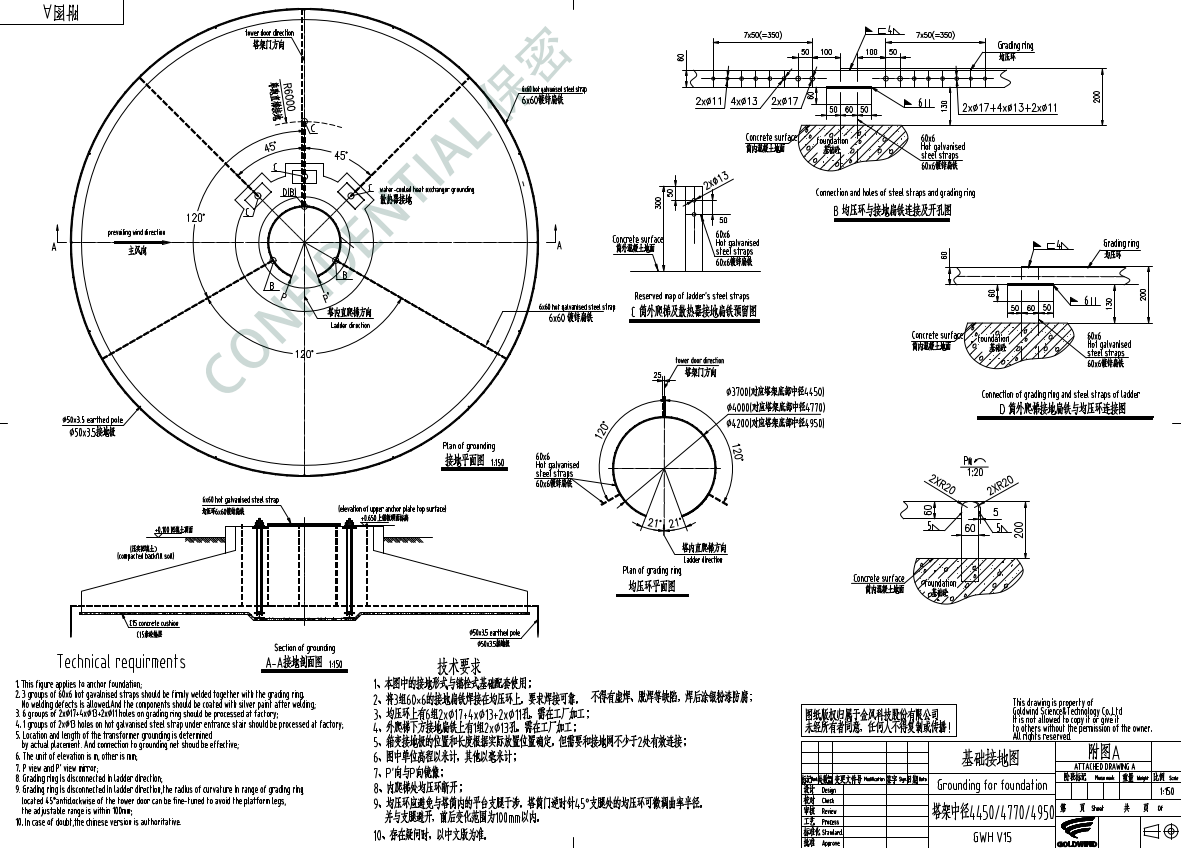

In [333]:
util.disp_image("Base diameter 4450_4770_4950.png")

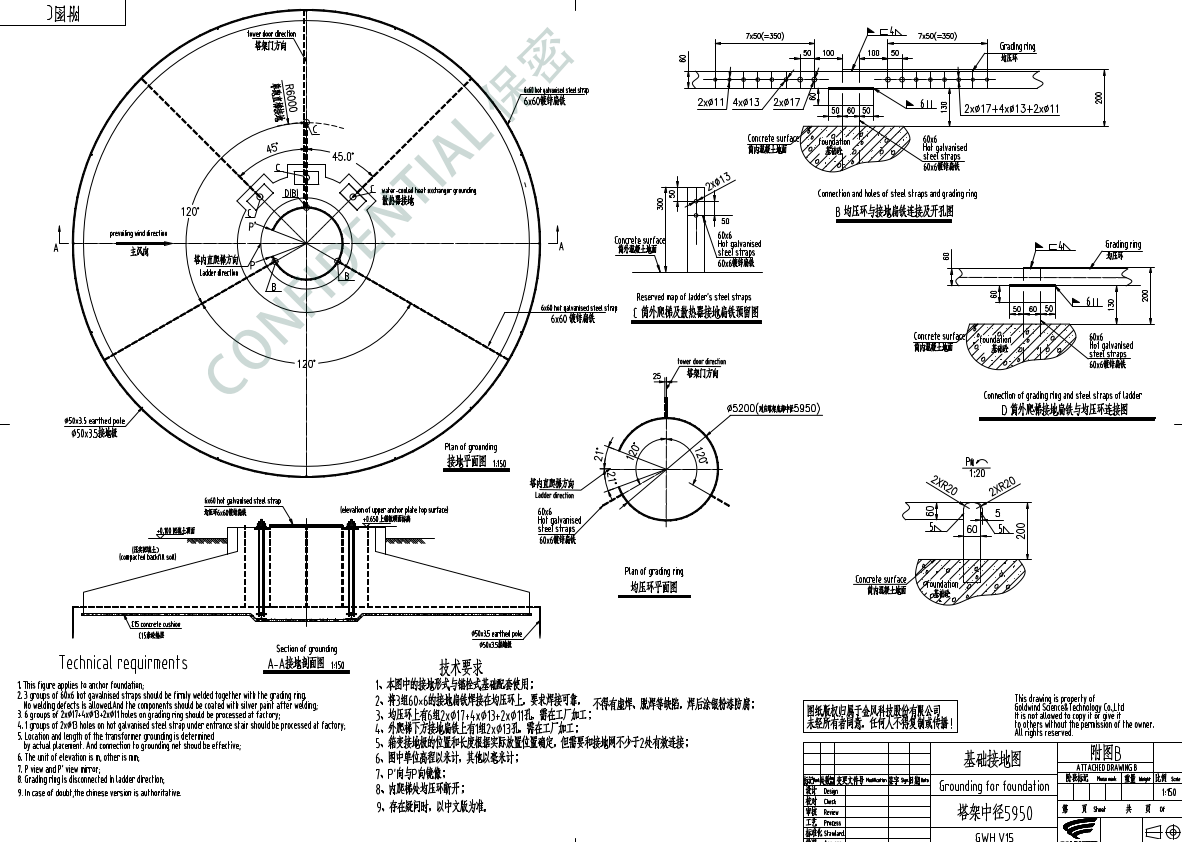

In [334]:
util.disp_image("Base diameter 5950.png")

## Geometry optimisation

We shall fix the diameter of the pedestal and downstand, as well as the height of the downstand, to accommodate the turbine and holding down bolt assembly. We can run an optimisation alogorithm to find the other parameters, minimising the total volume of concrete whilst satisfying all checks:

In [337]:
optimal, df_results = wf.optimise_foundation_geometry_parallel(LCs_wout_pf = LCs_wout_pf, LCs_w_pf = LCs_w_pf,    # Loading inputs
                                                               d1_min=20, d1_max=35, d_1_steps=100,    # Base diameter search range & resolution
                                                               h1_min=0.1, h1_max=2.5, h_1_steps=100,    # Base height search range & resolution
                                                               h2_min=1, h2_max=3, h_2_steps=100,    # Haunch height search range & resolution
                                                               h3_min=0.1, h3_max=1.0, h_3_steps=50, # Pedestal height search range & resolution
                                                               d2=7, b=7, h4=0.55, h5=0.15,    # Pedestal dia., downstand dims. & FGL fixed
                                                               h1_h2_thk_tol = 0.75,    # Tolerance around min. base + haunch thickness
                                                               theta_min_deg=6, theta_max_deg=12    # Range of acceptable haunch angles
                                                              )

Optimising geometry: 100%|█████████████████████████████████████████████████| 5685000/5685000 [38:32<00:00, 2458.87it/s]


The calculated geometry is given below:

In [339]:
print(optimal)

d1        27.424242
h1         1.675758
h2         2.090909
h3         0.963265
h4         0.550000
h5         0.150000
d2         7.000000
b          7.000000
hwt        0.000000
V_c     1577.872090
V_bs     989.852197
V_h      543.599099
V_p       37.070793
V_d        7.350000
Name: 1366, dtype: float64


C:\Users\MountjA\AppData\Local\Temp\ipykernel_49608\367642911.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


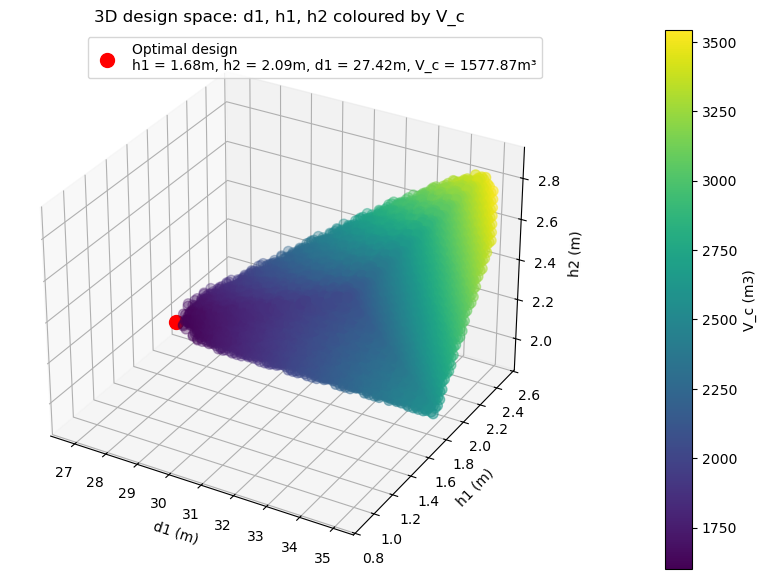

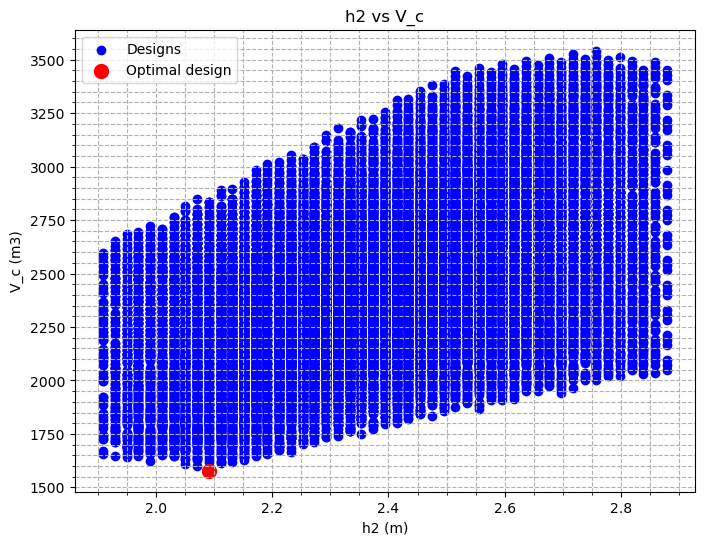

In [340]:
figs = wf.visualise_design_space(df_results.iloc[::50,:], optimal) #Note the resampled dataset
for fig in figs:
    fig.show()

C:\Users\MountjA\AppData\Local\Temp\ipykernel_49608\2782418707.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


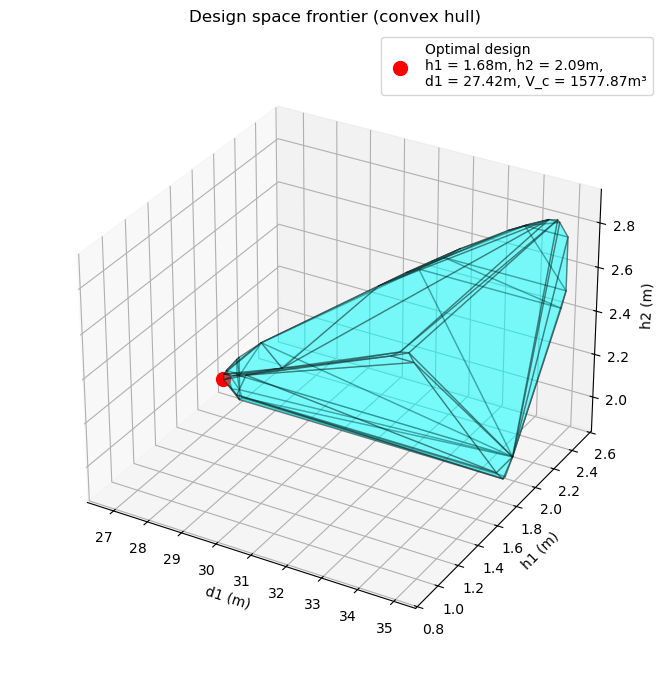

In [341]:
figss = wf.visualise_design_space_frontier(df_results, optimal) #Note the resampled dataset
for fig in figs:
    fig.show()

## Manual intervention

Let's rationalise the dimensions for design:

In [561]:
wf.interactive_foundations(d1_init=optimal['d1'], 
                           d2_init=optimal['d2'], 
                           h1_init=optimal['h1'], 
                           h2_init=optimal['h2'], 
                           h3_init=optimal['h3'],
                           h4_init=optimal['h4'],
                           h5_init=optimal['h5'],
                           b_init=optimal['b'],
                           hwt_init=optimal['hwt']
                          )

Output()

In [659]:
wf.foundation_params

{'d1': 27.5,
 'd2': 7.0,
 'h1': 1.65,
 'h2': 2.1,
 'h3': 0.95,
 'h4': 0.55,
 'h5': 0.15,
 'b': 7.0,
 'hwt': 0,
 'V_bs': 980.0296457643784,
 'V_h': 548.5417122708628,
 'V_p': 36.56028450615121,
 'V_d': 7.35,
 'V_c': 1572.4816425413924,
 'V_h_f': 698.76874597471,
 'V_p_f': 222.1891404251381,
 'V_w': 0,
 'Rebar_mass': 235872.24638120885}

Calculate total resolved moment at the top of the plinth and the bottom of the base slab:

In [661]:
wf.M_top_bottom(df=LCs_wout_pf, h1=wf.foundation_params['h1'], h2=wf.foundation_params['h2'], h3=wf.foundation_params['h3'], h4=wf.foundation_params['h4'])
LCs_wout_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m),Eccentricity Top of Plinth (m),Eccentricity Bottom of Slab (m),M_Res Top of Plinth (kNm),M_Res Bottom of Slab (kNm)
Loadcase,,,,,,,,,,
Mx_Max,6891.29,1683.054450,2783.834550,194726.548800,1,0.55,0.0,4.7,194726.548800,202636.904715
Mx_Min,6897.52,1806.446250,-3088.907325,184711.008825,1,0.55,0.0,4.7,184711.008825,193201.306200
My_Max,7117.85,1412.269425,2003.374800,185750.776575,1,0.55,0.0,4.7,185750.776575,192388.442872
My_Min,6944.34,960.167250,826.037100,132076.765800,1,0.55,0.0,4.7,132076.765800,136589.551875
Mxy_Max,6706.11,1801.032975,5051.489625,201020.952825,1,0.55,0.0,4.7,201020.952825,209485.807807
Mxy_Min,7213.88,72.555525,-667.376325,8.257725,1,0.55,0.0,4.7,8.257725,349.268693
Mz_Max,7013.75,1111.639725,14845.592475,130952.281950,1,0.55,0.0,4.7,130952.281950,136176.988658
Mz_Min,6911.55,897.732675,-18020.693250,94805.198775,1,0.55,0.0,4.7,94805.198775,99024.542347
Fx_Max,6783.59,1757.032200,-7484.905575,168873.309675,1,0.55,0.0,4.7,168873.309675,177131.361015


In [662]:
wf.M_top_bottom(df=LCs_w_pf, h1=wf.foundation_params['h1'], h2=wf.foundation_params['h2'], h3=wf.foundation_params['h3'], h4=wf.foundation_params['h4'])
LCs_w_pf

,Axial (kN),Resolved shear (kN),Torsional moment (kNm),Resolved moment (kNm),ULS partial factor,Assumed height above ground level (m),Eccentricity Top of Plinth (m),Eccentricity Bottom of Slab (m),M_Res Top of Plinth (kNm),M_Res Bottom of Slab (kNm)
Loadcase,,,,,,,,,,
Mx_Max,7136.859259,1539.571833,4231.574667,179506.346780,1.35,0.55,0.0,4.7,179506.346780,186742.334397
Mx_Min,7049.333333,1661.524667,-4869.130000,184780.412854,1.35,0.55,0.0,4.7,184780.412854,192589.578788
My_Max,7078.837037,1363.498500,1053.728667,176343.388720,1.35,0.55,0.0,4.7,176343.388720,182751.831668
My_Min,6944.336364,960.167250,826.043114,132076.763816,1.10,0.55,0.0,4.7,132076.763816,136589.549891
Mxy_Max,7056.674074,1591.895666,5079.184833,183847.828500,1.35,0.55,0.0,4.7,183847.828500,191329.738132
Mxy_Min,7213.881818,72.554523,-667.373318,8.258727,1.10,0.55,0.0,4.7,8.258727,349.264984
Mz_Max,7387.851852,725.877833,13432.729332,81491.777495,1.35,0.55,0.0,4.7,81491.777495,84903.403312
Mz_Min,6911.545455,897.735682,-18020.693250,94805.197772,1.10,0.55,0.0,4.7,94805.197772,99024.555476
Fx_Max,7189.251852,1361.987667,-4178.867000,170206.971622,1.35,0.55,0.0,4.7,170206.971622,176608.313655


In [663]:
Conc_DL = wf.foundation_perm_load(volume = wf.foundation_params['V_c'], density = wf.mat_props['g_concrete'])
Ballast_Sub = wf.foundation_perm_load(volume = wf.foundation_params['V_h_f'] + wf.foundation_params['V_p_f'], density = wf.mat_props['g_ballast_dry'])
Hydrostatic_Uplift = wf.foundation_perm_load(volume = wf.foundation_params['V_w'], density = wf.mat_props['g_water'])

print(f'The vertical load from the foundation concrete is {Conc_DL:.2f}kN')
print(f'The vertical load from the fill is {Ballast_Sub:.2f}kN')
print(f'The vertical load from buoyancy is {Hydrostatic_Uplift:.2f}kN')

The vertical load from the foundation concrete is 38525.80kN
The vertical load from the fill is 16577.24kN
The vertical load from buoyancy is -0.00kN


## Turbine manufacturer checks

### Foundation gapping

Check there is no loss of contact (i.e. 'inactive area') between the underside of base and the formation. The eccentricity limit is given as R/4.

In [667]:
no_gapping = wf.no_gapping(d1 = wf.foundation_params['d1'], 
                           M_Res = LCs_wout_pf['M_Res Bottom of Slab (kNm)'],
                           F_z_turb = LCs_wout_pf['Axial (kN)'],
                           F_z_found = Conc_DL + Ballast_Sub + Hydrostatic_Uplift,
                           R_ratio = 4
                          )

no_gapping

,e_limit (m),M_Res (kNm),F_z (kN),e (m),Utilisation,Result
Loadcase,,,,,,
Mx_Max,3.4375,202636.904715,61994.332197,3.268636,0.950876,Pass
Mx_Min,3.4375,193201.306200,62000.562197,3.116122,0.906508,Pass
My_Max,3.4375,192388.442872,62220.892197,3.092023,0.899498,Pass
My_Min,3.4375,136589.551875,62047.382197,2.201375,0.640400,Pass
Mxy_Max,3.4375,209485.807807,61809.152197,3.389236,0.985960,Pass
Mxy_Min,3.4375,349.268693,62316.922197,0.005605,0.001630,Pass
Mz_Max,3.4375,136176.988658,62116.792197,2.192273,0.637752,Pass
Mz_Min,3.4375,99024.542347,62014.592197,1.596794,0.464522,Pass
Fx_Max,3.4375,177131.361015,61886.632197,2.862191,0.832637,Pass


### Ultimate loads ground contact

Check that not more than 50% of the base is without compression. For circular bases, the eccentricity limit is given as 0.59R. 

In [670]:
ult_load_gc = wf.no_gapping(d1 = wf.foundation_params['d1'], 
                            M_Res = LCs_wout_pf['M_Res Bottom of Slab (kNm)'],
                            F_z_turb = LCs_wout_pf['Axial (kN)'],
                            F_z_found = Conc_DL + Ballast_Sub + Hydrostatic_Uplift,
                            R_ratio = 1/0.59
                           )

ult_load_gc

,e_limit (m),M_Res (kNm),F_z (kN),e (m),Utilisation,Result
Loadcase,,,,,,
Mx_Max,8.1125,202636.904715,61994.332197,3.268636,0.402914,Pass
Mx_Min,8.1125,193201.306200,62000.562197,3.116122,0.384114,Pass
My_Max,8.1125,192388.442872,62220.892197,3.092023,0.381143,Pass
My_Min,8.1125,136589.551875,62047.382197,2.201375,0.271356,Pass
Mxy_Max,8.1125,209485.807807,61809.152197,3.389236,0.417779,Pass
Mxy_Min,8.1125,349.268693,62316.922197,0.005605,0.000691,Pass
Mz_Max,8.1125,136176.988658,62116.792197,2.192273,0.270234,Pass
Mz_Min,8.1125,99024.542347,62014.592197,1.596794,0.196831,Pass
Fx_Max,8.1125,177131.361015,61886.632197,2.862191,0.352812,Pass


### Soil bearing pressure

Check that the maximum soil stress at the edge of the foundation is less than the allowable bearing pressure.

In [673]:
sbp = wf.soil_bearing_pressure(d1 = wf.foundation_params['d1'],
                               M_Res = LCs_wout_pf['M_Res Bottom of Slab (kNm)'],
                               F_z_turb = LCs_wout_pf['Axial (kN)'],
                               F_z_found = Conc_DL + Ballast_Sub + Hydrostatic_Uplift,
                               Theta_allow = 250
                              )

sbp

,d1,M_Res (kNm),F_z (kN),e (m),e/r,K,Theta_max (kPa),Utilisation_max,Result_max,alpha (degs),A_eff (m2),Theta_mean (kPa),Utilisation_mean,Result_mean
Loadcase,,,,,,,,,,,,,,
Mx_Max,27.5,202636.904715,61994.332197,3.268636,0.237719,1.950876,203.622781,0.814491,Pass,152.496097,415.890223,149.064173,0.596257,Pass
Mx_Min,27.5,193201.306200,62000.562197,3.116122,0.226627,1.906508,199.011893,0.796048,Pass,153.802855,424.049239,146.210761,0.584843,Pass
My_Max,27.5,192388.442872,62220.892197,3.092023,0.224874,1.899498,198.984720,0.795939,Pass,154.009013,425.340448,146.284917,0.585140,Pass
My_Min,27.5,136589.551875,62047.382197,2.201375,0.160100,1.640400,171.363352,0.685453,Pass,161.574599,473.400982,131.067287,0.524269,Pass
Mxy_Max,27.5,209485.807807,61809.152197,3.389236,0.246490,1.985960,206.665472,0.826662,Pass,151.460202,409.454572,150.954847,0.603819,Pass
Mxy_Min,27.5,349.268693,62316.922197,0.005605,0.000408,1.400000,146.885445,0.587542,Pass,179.953291,593.649102,104.972655,0.419891,Pass
Mz_Max,27.5,136176.988658,62116.792197,2.192273,0.159438,1.637752,171.278147,0.685113,Pass,161.651438,473.895138,131.077083,0.524308,Pass
Mz_Min,27.5,99024.542347,62014.592197,1.596794,0.116130,1.464522,152.909515,0.611638,Pass,166.662332,506.331483,122.478247,0.489913,Pass
Fx_Max,27.5,177131.361015,61886.632197,2.862191,0.208159,1.832637,190.949322,0.763797,Pass,155.970986,437.681209,141.396594,0.565586,Pass


## ULS static equilibrium checks

### Overturning

Check EQU set for fully drained condition:

In [677]:
overturning = wf.overturning(d1 = wf.foundation_params['d1'],
                          F_z_turb = LCs_w_pf['Axial (kN)'],
                          F_z_found_conc = Conc_DL,
                          F_z_found_steel = 0,
                          F_z_found_ballast = Ballast_Sub,
                          F_z_found_buoyancy = Hydrostatic_Uplift,
                          M_Res = LCs_w_pf['M_Res Bottom of Slab (kNm)'],
                          Q_fact = LCs_w_pf['ULS partial factor'],
                          gamma_G_stb = 0.9,
                          gamma_G_dst = 1.10
                         )

overturning

,e (m),Fz (kN),"Md,stb (kNm)","Md,dst (kNm)",Utilisation,Result
Loadcase,,,,,,
Mx_Max,13.75,56015.911311,770218.780524,252102.151436,0.327312,Pass
Mx_Min,13.75,55937.137977,769135.647189,259995.931364,0.338037,Pass
My_Max,13.75,55963.691311,769500.755526,246714.972752,0.320617,Pass
My_Min,13.75,55842.640705,767836.309698,150248.504880,0.195678,Pass
Mxy_Max,13.75,55943.744644,769226.488859,258295.146478,0.335786,Pass
Mxy_Min,13.75,56085.231614,771171.934691,384.191483,0.000498,Pass
Mz_Max,13.75,56241.804645,773324.813862,114619.594471,0.148217,Pass
Mz_Min,13.75,55813.128887,767430.522199,108927.011024,0.141937,Pass
Fx_Max,13.75,56063.064645,770867.138862,238421.223435,0.309290,Pass


### Sliding

Check EQU set for fully drained condition:

In [680]:
sliding = wf.sliding(d1 = wf.foundation_params['d1'],
                  phi = wf.mat_props['phi_prime'],
                  F_z_turb = LCs_w_pf['Axial (kN)'],
                  F_z_found_conc = Conc_DL,
                  F_z_found_steel = 0,
                  F_z_found_ballast = Ballast_Sub,
                  F_z_found_buoyancy = Hydrostatic_Uplift,
                  F_Res = LCs_w_pf['Resolved shear (kN)'],
                  M_z = LCs_w_pf['Torsional moment (kNm)'],
                  M_Res = LCs_w_pf['M_Res Bottom of Slab (kNm)'],
                  Q_fact = LCs_w_pf['ULS partial factor'],
                  gamma_G_stb = 0.9,
                  gamma_G_dst = 1.10,
                  lambda_phi = 1.25
                 )

sliding

,Fz (kN),M_Res (kNm),M_z (kNm),e (m),phi (degs),tan(phi_d),A_eff (m2),b_e (m),l_e (m),l_eff (m),H'(kN),"Hd,stb (kN)","Hd,dst (kN)",Utilisation,Result
Loadcase,,,,,,,,,,,,,,,
Mx_Max,56015.911311,252102.151436,5712.625800,4.500545,30.0,0.46188,350.921048,18.498909,25.985195,22.202130,2655.781817,25872.641179,4734.203792,1.829811e-01,Pass
Mx_Min,55937.137977,259995.931364,-6573.325499,4.648002,30.0,0.46188,343.272916,18.203996,25.881157,22.091655,1725.561341,25836.257335,3968.619641,1.536066e-01,Pass
My_Max,55963.691311,246714.972752,1422.533700,4.408483,30.0,0.46188,355.711401,18.683034,26.048246,22.269703,1972.906124,25848.521795,3813.629098,1.475376e-01,Pass
My_Min,55842.640705,150248.504880,908.647425,2.690569,30.0,0.46188,446.925901,22.118861,26.968377,23.343382,1136.899778,25792.610915,2193.083753,8.502760e-02,Pass
Mxy_Max,55943.744644,258295.146478,6856.899524,4.617051,30.0,0.46188,344.875678,18.265897,25.903308,22.115074,2856.848024,25839.308824,5005.907173,1.937322e-01,Pass
Mxy_Min,56085.231614,384.191483,-734.110650,0.006850,30.0,0.46188,593.580604,27.486300,27.499997,24.369579,39.749221,25904.658856,119.559196,4.615355e-03,Pass
Mz_Max,56241.804645,114619.594471,18134.184598,2.037979,30.0,0.46188,482.280299,23.424043,27.196260,23.663198,3351.870559,25976.976841,4331.805634,1.667556e-01,Pass
Mz_Min,55813.128887,108927.011024,-19822.762575,1.951638,30.0,0.46188,486.978796,23.596724,27.221580,23.702046,269.752057,25778.979990,1257.261308,4.877079e-02,Pass
Fx_Max,56063.064645,238421.223435,-5641.470451,4.252733,30.0,0.46188,363.841649,18.994535,26.151617,22.381601,1402.422007,25894.420371,3241.105357,1.251662e-01,Pass
